# Mecánica del medio continuo

Importamos librerias necesarias

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## 1) Ecuaciones de movimiento

Definimos las variables y las ecuaciones:

In [2]:
X1 = sp.S('X1')
X2 = sp.S('X2')
X3 = sp.S('X3')
t = sp.S('t')
# ecuaciones planteadas en el problema
x1 = X1 * sp.exp(5 * t) + X3 * (sp.exp(3 * t) -t) + X2*t
x2 = X1 * t ** 3 + 5 * t * X2 + 3 * X3 * (sp.exp(2 * t) - sp.exp(- 2 * t)) 
x3 = X1 * t ** 3 + 5 * t * X2 * X3 

In [3]:
x1

X1*exp(5*t) + X2*t + X3*(-t + exp(3*t))

In [4]:
x2

X1*t**3 + 5*X2*t + 3*X3*(exp(2*t) - exp(-2*t))

In [5]:
x3

X1*t**3 + 5*X2*X3*t

### Definimos las componentes de velocidad y aceleración en descripciones lagrangianas y eulirianas.

La velocidad en la descripción material es:

In [6]:
# DESCRIPCIÓN LAGRANGIANA VELOCIDAD
v1 = x1.diff(t)
v2 = x2.diff(t)
v3 = x3.diff(t)

In [7]:
v1

5*X1*exp(5*t) + X2 + X3*(3*exp(3*t) - 1)

In [8]:
v2

3*X1*t**2 + 5*X2 + 3*X3*(2*exp(2*t) + 2*exp(-2*t))

In [9]:
v3

3*X1*t**2 + 5*X2*X3

la aceleración en la descripción material es:

In [10]:
# DESCRIPCIÓN LAGRANGIANA ACELERACIÓN
a1 = v1.diff(t)
a2 = v2.diff(t)
a3 = v3.diff(t)

In [11]:
a1

25*X1*exp(5*t) + 9*X3*exp(3*t)

In [12]:
a2

6*X1*t + 3*X3*(4*exp(2*t) - 4*exp(-2*t))

In [13]:
a3

6*X1*t

Construimos Matriz de coeficientes:

In [14]:
#Matriz
matriz_coef = [[ sp.exp(5 * t), t , sp.exp(3 * t) -t],
               [t ** 3 ,  5 * t, 3*(sp.exp(2 * t) - sp.exp(- 2 * t))],
               [t ** 3, 0,  5 * t * X2]]

# variables
Y = [[X1, 0, 0], [0, X2, 0], [0, 0, X3]]

In [15]:
sp.Matrix(matriz_coef)

Matrix([
[exp(5*t),   t,            -t + exp(3*t)],
[    t**3, 5*t, 3*exp(2*t) - 3*exp(-2*t)],
[    t**3,   0,                   5*X2*t]])

In [16]:
sp.Matrix(Y)

Matrix([
[X1,  0,  0],
[ 0, X2,  0],
[ 0,  0, X3]])

Encontramos el Jacobiano:

In [17]:
jacobiano = []
matriz = np.dot(matriz_coef, Y)
y = [X1,X2,X3]
for index in range(len(matriz_coef)):
    item = sp.Matrix(matriz[:,index])
    jacobiano.append(item.diff(y[index]).T)
jacobiano = np.array(jacobiano).T

In [18]:
sp.Matrix(jacobiano)

Matrix([
[exp(5*t),   t,            -t + exp(3*t)],
[    t**3, 5*t, 3*exp(2*t) - 3*exp(-2*t)],
[    t**3,   0,                   5*X2*t]])

Determinante del jacobiano:

In [19]:
det = sp.Matrix(jacobiano).det()

In [20]:
det

-5*X2*t**5 + 25*X2*t**2*exp(5*t) + 5*t**5 - 5*t**4*exp(3*t) + 3*t**4*exp(2*t) - 3*t**4*exp(-2*t)

Encontramos matriz adjunta de la matriz de coeficientes del jacobiano:

In [21]:
adjunta = sp.Matrix(jacobiano).adjugate()

In [22]:
adjunta

Matrix([
[                                     25*X2*t**2,                             -5*X2*t**2, 5*t**2 - 5*t*exp(3*t) + 3*t*exp(2*t) - 3*t*exp(-2*t)],
[-5*X2*t**4 + 3*t**3*exp(2*t) - 3*t**3*exp(-2*t), 5*X2*t*exp(5*t) + t**4 - t**3*exp(3*t),      -t**4 + t**3*exp(3*t) - 3*exp(7*t) + 3*exp(3*t)],
[                                        -5*t**4,                                   t**4,                                 -t**4 + 5*t*exp(5*t)]])

Extraemos los valores de X1, X2 y X3:

In [23]:
x1 = np.sum(adjunta[0,:])
x2 = np.sum(adjunta[1,:])
x3 = np.sum(adjunta[2,:])

In [24]:
x1

20*X2*t**2 + 5*t**2 - 5*t*exp(3*t) + 3*t*exp(2*t) - 3*t*exp(-2*t)

In [25]:
x2

-5*X2*t**4 + 5*X2*t*exp(5*t) + 3*t**3*exp(2*t) - 3*t**3*exp(-2*t) - 3*exp(7*t) + 3*exp(3*t)

In [26]:
x3

-5*t**4 + 5*t*exp(5*t)

Ahora reemplazamos los valores de X1, X2 y X3 en las ecuaciones de velocidad

In [27]:
V1 = 5*x1*sp.exp(5*t)+x2+x3*(3*sp.exp(3*t)-1)
V1

-5*X2*t**4 + 5*X2*t*exp(5*t) + 3*t**3*exp(2*t) - 3*t**3*exp(-2*t) + (-5*t**4 + 5*t*exp(5*t))*(3*exp(3*t) - 1) + (100*X2*t**2 + 25*t**2 - 25*t*exp(3*t) + 15*t*exp(2*t) - 15*t*exp(-2*t))*exp(5*t) - 3*exp(7*t) + 3*exp(3*t)

In [28]:
V2 = 3*x1*t**2 + 5*x2 +3*x3*(2*sp.exp(2*t)+2*sp.exp(-2*t))
V2

-25*X2*t**4 + 25*X2*t*exp(5*t) + 15*t**3*exp(2*t) - 15*t**3*exp(-2*t) + t**2*(60*X2*t**2 + 15*t**2 - 15*t*exp(3*t) + 9*t*exp(2*t) - 9*t*exp(-2*t)) + (-15*t**4 + 15*t*exp(5*t))*(2*exp(2*t) + 2*exp(-2*t)) - 15*exp(7*t) + 15*exp(3*t)

In [29]:
V3 = 3*x1*t**2 + 5*x2*x3
V3

t**2*(60*X2*t**2 + 15*t**2 - 15*t*exp(3*t) + 9*t*exp(2*t) - 9*t*exp(-2*t)) + (-5*t**4 + 5*t*exp(5*t))*(-25*X2*t**4 + 25*X2*t*exp(5*t) + 15*t**3*exp(2*t) - 15*t**3*exp(-2*t) - 15*exp(7*t) + 15*exp(3*t))

Reemplazamos los valores de X1, X2 y X3 en las ecuaciones de la aceleración

In [31]:
A1 = 25*x1*sp.exp(5*t) + 9*x3*sp.exp(3*t)
A1

(-45*t**4 + 45*t*exp(5*t))*exp(3*t) + (500*X2*t**2 + 125*t**2 - 125*t*exp(3*t) + 75*t*exp(2*t) - 75*t*exp(-2*t))*exp(5*t)

In [34]:
A2 = 6*x1*t + 3*x3*(4*sp.exp(2*t)-sp.exp(-2*t))
A2

t*(120*X2*t**2 + 30*t**2 - 30*t*exp(3*t) + 18*t*exp(2*t) - 18*t*exp(-2*t)) + (-15*t**4 + 15*t*exp(5*t))*(4*exp(2*t) - exp(-2*t))

In [37]:
A3 = 6*x1*t
A3

t*(120*X2*t**2 + 30*t**2 - 30*t*exp(3*t) + 18*t*exp(2*t) - 18*t*exp(-2*t))

## 2) Esfuerzo principal

Definimos variables:

In [30]:
lamda = sp.S('lamda')

construimos matriz:

In [31]:
m = np.array([[15, 17, 9],[17, 20, 10], [9, 10, 15]])

In [32]:
sp.Matrix(m)

Matrix([
[15, 17,  9],
[17, 20, 10],
[ 9, 10, 15]])

In [33]:
matriz = sp.Matrix(m)  - sp.eye(3)*lamda

In [34]:
matriz

Matrix([
[15 - lamda,         17,          9],
[        17, 20 - lamda,         10],
[         9,         10, 15 - lamda]])

encotramos determinante:

In [35]:
det = matriz.det()

In [36]:
det

-lamda**3 + 50*lamda**2 - 355*lamda + 105

In [37]:
print('los valores de lamda son: ')
solucion = sp.solve(det, lamda)
lamda_1 = sp.re(solucion[0].evalf())
lamda_2 = sp.re(solucion[1].evalf())
lamda_3 = sp.re(solucion[2].evalf())
print('lamda_1 =', lamda_1)
print('lamda_2 =', lamda_2)
print('lamda_3 =', lamda_3)

los valores de lamda son: 
lamda_1 = 8.18237657880612
lamda_2 = 0.309152742252176
lamda_3 = 41.5084706789417


## las direcciones principales para el punto. 

Para lamda_1 = 8.18237657880612

In [40]:
M = sp.Matrix(m)  - sp.eye(3)*lamda_1
M

Matrix([
[6.81762342119388,               17,                9],
[              17, 11.8176234211939,               10],
[               9,               10, 6.81762342119388]])

Resolvemos el sistema de ecuaciones

In [54]:
# 6.81762342119388*n1 + 17*n2 + 9*n3 = 0
# 17*n1 + 11.8176234211939*n2 + 10*n3 = 0
# 9*n1 + 10*n2 + 6.81762342119388*n3 = 0
# n1 ** 2 + n2 ** 2 + n3 ** 2 - 1 = 0 
n1 = sp.S('n1')
n2 = sp.S('n2')
n3 = sp.S('n3')

In [58]:
# cogemos 3 de las 4 ecuaciones
n1, n2, n3 = sp.solve([17*n1 + 11.8176234211939*n2 + 10*n3, 9*n1 + 10*n2 + 6.81762342119388*n3, n1 ** 2 + n2 ** 2 + n3 ** 2 -1], [n1, n2, n3])[0]
print('la solución del sistema de ecuaciones es:')
print('n1 = ', n1)
print('n2 = ', n2)
print('n3 = ', n3)

la solución del sistema de ecuaciones es:
n1 =  -0.272137917113568
n2 =  -0.362716201360598
n3 =  0.891278806737615


In [59]:
# comprobamos que se cumpla la cuarta ecuación
6.81762342119388*n1 + 17*n2 + 9*n3

-1.95399252334028e-14

Se cumple, por lo tanto el vector n en la dirección 1 está dado por:

In [128]:
n = sp.Matrix([n1,n2,n3])
n

Matrix([
[-0.585172727155406],
[-0.672903627231545],
[ -0.45251915744213]])

In [139]:
# al normalizar el vector se tiene que:
normal = n.norm()
normalized_n = n / normal
normalized_n

Matrix([
[-0.585172727155406],
[-0.672903627231545],
[ -0.45251915744213]])

para lamda_2 = 0.309152742252176

In [140]:
M = sp.Matrix(m)  - sp.eye(3)*lamda_2
M

Matrix([
[14.6908472577478,               17,                9],
[              17, 19.6908472577478,               10],
[               9,               10, 14.6908472577478]])

In [141]:
# Resolvemos el sistema de ecuaciones

# 14.6908472577478*n1 + 17*n2 + 9*n3 = 0
# 17*n1 + 19.6908472577478*n2 + 10*n3 = 0
# 9*n1 + 10*n2 + 14.6908472577478*n3 = 0
# n1 ** 2 + n2 ** 2 + n3 ** 2 - 1 = 0 
# definimos variables
n1 = sp.S('n1')
n2 = sp.S('n2')
n3 = sp.S('n3')

# cogemos 3 de las 4 ecuaciones
n1, n2, n3 = sp.solve([17*n1 + 19.6908472577478*n2 + 10*n3, 9*n1 + 10*n2 + 14.6908472577478*n3, n1 ** 2 + n2 ** 2 + n3 ** 2 -1], [n1, n2, n3])[0]
print('la solución del sistema de ecuaciones es:')
print('n1 = ', n1)
print('n2 = ', n2)
print('n3 = ', n3)

la solución del sistema de ecuaciones es:
n1 =  -0.763880771758651
n2 =  0.644699670954756
n3 =  0.0291290372006702


In [142]:
# comprobamos que se cumpla la cuarta ecuación
14.6908472577478*n1 + 17*n2 + 9*n3

3.30291349825984e-14

Se cumple, por lo tanto el vector n en la dirección 1 está dado por:

In [143]:
n = sp.Matrix([n1,n2,n3])
n

Matrix([
[-0.763880771758651],
[ 0.644699670954756],
[0.0291290372006702]])

In [146]:
# al normalizar el vector se tiene que:
normal = n.norm()
normalized_n = n / normal
normalized_n

Matrix([
[-0.763880771758651],
[ 0.644699670954756],
[0.0291290372006702]])

para lamda_3 = 41.5084706789417

In [147]:
M = sp.Matrix(m)  - sp.eye(3)*lamda_3
M

Matrix([
[-26.5084706789417,                17,                 9],
[               17, -21.5084706789417,                10],
[                9,                10, -26.5084706789417]])

In [148]:
# Resolvemos el sistema de ecuaciones

# −26.5084706789417*n1 + 17*n2 + 9*n3 = 0
# 17*n1 − 21.5084706789417*n2 + 10*n3 = 0
# 9*n1 + 10*n2 − 26.5084706789417*n3 = 0
# n1 ** 2 + n2 ** 2 + n3 ** 2 - 1 = 0

# definimos variables
n1 = sp.S('n1')
n2 = sp.S('n2')
n3 = sp.S('n3')

# cogemos 3 de las 4 ecuaciones
n1, n2, n3 = sp.solve([17*n1 - 21.5084706789417*n2 + 10*n3, 9*n1 + 10*n2 - 26.5084706789417*n3, n1 ** 2 + n2 ** 2 + n3 ** 2 -1], [n1, n2, n3])[0]
print('la solución del sistema de ecuaciones es:')
print('n1 = ', n1)
print('n2 = ', n2)
print('n3 = ', n3)

la solución del sistema de ecuaciones es:
n1 =  -0.585172727155406
n2 =  -0.672903627231545
n3 =  -0.452519157442130


In [150]:
# comprobamos que se cumpla la cuarta ecuación
-26.5084706789417*n1 + 17*n2 + 9*n3

-1.77635683940025e-15

Se cumple, por lo tanto el vector n en la dirección 1 está dado por:

In [151]:
n = sp.Matrix([n1,n2,n3])
n

Matrix([
[-0.585172727155406],
[-0.672903627231545],
[ -0.45251915744213]])

In [152]:
# al normalizar el vector se tiene que:
normal = n.norm()
normalized_n = n / normal
normalized_n

Matrix([
[-0.585172727155406],
[-0.672903627231545],
[ -0.45251915744213]])

## 3) Deformación longitud barra cuadrada

definimos constantes:

In [53]:
E = np.power(12,7)
v = 0.25

variación de deformaciones: 

In [80]:
ay = np.linspace(500*np.power(10,3),5000*np.power(10,3),20)
Ex = (1 / E) * (0 - v*(ay + 0))
Ey = (1 / E) * (ay - v * (0 + 0))
Ez = (1 / E) * (0 - v * (0 + ay))

Gráfic de deformación:

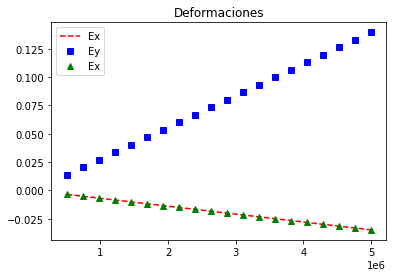

In [81]:
plt.plot(ay, Ex, 'r--', label='Ex')
plt.plot(ay, Ey, 'bs', label='Ey')
plt.plot(ay, Ez, 'g^', label='Ex')
plt.title('Deformaciones')
plt.legend()
plt.show()

Variación longitud:

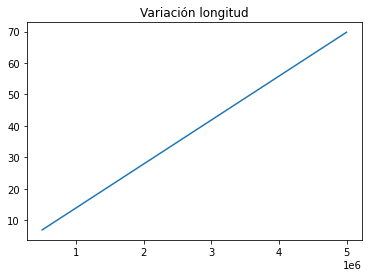

In [83]:
#variacion de longitud:
longitud = 500
dL = Ey*longitud
plt.plot(ay,dL)
plt.title('Variación longitud')
plt.show()

## 4)  Variación de volumen cubo metálico

definimos constates:

In [84]:
a = 0.3
E = 21 * np.power(10,4)
v = 0.25
p = 1.0267
g = 9.8

Definimos deformación del volumen:

In [87]:
profundidad = np.linspace(200,1000,10)

presion = profundidad * p * g

deformacion = (1 / E) * (-presion - v * (-presion + -presion))

volumen = 3 * np.abs(deformacion) * np.power(a,3)


Grafica de variación de volumen:

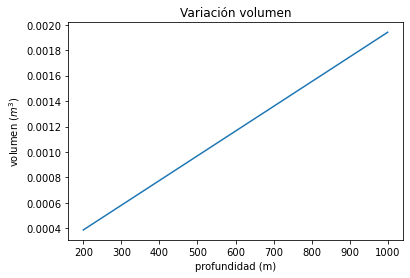

In [98]:
plt.plot(profundidad, volumen)
plt.title('Variación volumen')
plt.ylabel(r'volumen ($m^3$)')
plt.xlabel('profundidad (m)')
plt.show()

## 5) Densidad campo velocidades

ecuación campo velocidades:

In [115]:
#definimos variables y ecuación
x = sp.S('x')
t = sp.S('t')
p = sp.S('p')
p0 = sp.S('p0')
c = sp.S('c')

v = (x - 15) / (12 + 2 * t) ** 2

In [111]:
v

(x - 15)/(2*t + 12)**2

Plantear la ecuación de conservación de masa:

$\frac{dp}{dt}$ + $\frac{\partial \mathcal{V} }{\partial \mathcal{X}}$ = 0



In [112]:
#conservación de masa
dii = 3

dvdx = v.diff(x)
dpdt = - dii * dvdx

In [102]:
dpdt

-3/(2*t + 12)**2

Separar variables e integración

In [131]:
ec1 = (1/p).integrate(p)
ec2 = dpdt.integrate(t)

In [132]:
ec1

log(p)

In [105]:
ec2

3/(4*t + 24)

Se encuentra el valor de C

In [116]:
C = sp.solve(ec1.subs(p,p0)-ec2.subs(t,0)-c,c)[0]

In [117]:
C

log(p0) - 1/8

In [118]:
ec3 = ec2 + C

In [127]:
ec3

log(p0) - 1/8 + 3/(4*t + 24)

Finalmente resolvemos para P

In [137]:
P = sp.solve(ec1-ec3,p)[0]

In [138]:
P

exp((8*t*log(p0) - t + 48*log(p0))/(8*(t + 6)))